In [1]:
import tensorflow as tf

gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [2]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=False,
    vertical_flip=False,
    rotation_range=0,
    height_shift_range=0,
    width_shift_range=0,
    samplewise_center=True,
    zoom_range=0
)

In [3]:
train = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_train',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

valid = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_valid',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(train, verbose=1, epochs=20, validation_data=valid)

Epoch 1/20
313/313 [==============================] - 23s 34ms/step - loss: 160.5361 - accuracy: 0.3042 - val_loss: 87.9983 - val_accuracy: 0.5335
Epoch 2/20
313/313 [==============================] - 10s 32ms/step - loss: 51.3268 - accuracy: 0.6686 - val_loss: 85.5309 - val_accuracy: 0.5915
Epoch 3/20
313/313 [==============================] - 10s 32ms/step - loss: 30.8449 - accuracy: 0.7653 - val_loss: 57.8069 - val_accuracy: 0.6530
Epoch 4/20
313/313 [==============================] - 10s 33ms/step - loss: 19.3022 - accuracy: 0.8288 - val_loss: 51.4885 - val_accuracy: 0.6800
Epoch 5/20
313/313 [==============================] - 10s 33ms/step - loss: 16.0298 - accuracy: 0.8566 - val_loss: 49.9312 - val_accuracy: 0.6915
Epoch 6/20
313/313 [==============================] - 10s 33ms/step - loss: 13.5566 - accuracy: 0.8720 - val_loss: 52.9118 - val_accuracy: 0.7245
Epoch 7/20
313/313 [==============================] - 10s 32ms/step - loss: 11.6507 - accuracy: 0.8923 - val_loss: 46.5956 

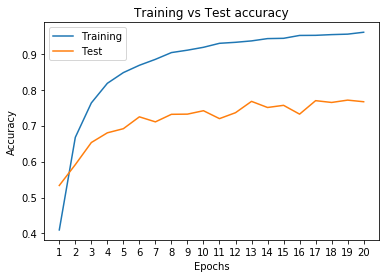

In [7]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(range(1, 21), train_acc)
plt.plot(range(1, 21), val_acc)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training', 'Test'])
plt.title('Training vs Test accuracy')
plt.show()

In [8]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}